# Aprendizaje Automático
## Práctica guiada sobre preparación de los datos
---
Para la primera práctica del curso de aprendizaje automático, se trabajará con un conjunto de datos que pertenece al repositorio especial de Machine Learning de la [UCI](https://archive.ics.uci.edu/ml). El conjunto de datos se llama "Adult" y toda la información correspondiente al mismo se encuentra [aquí](https://archive.ics.uci.edu/ml/datasets/Adult).

En principio, se puede observar que el conjunto de datos tiene las siguientes características:
+ Atributos multivariados.
+ Atributos categóricos y enteros.
+ Resuelve un problema de clasificación.
+ 48842 Instancias entre train y test.
+ 14 Atributos.
+ Le faltan valores a algunos atributos (datos faltantes).

Básicamente los datos pertenecientes al conjunto "Adult" hacen referencia a diversos atributos de 48842 adultos distintos que ayudan a resolver la tarea de clasificar a tales adultos en dos clases principales: `<=50k` y `>50k`, que respectivamente hacen referencia a cuando el adulto gana 50.000 dólares al año o menos y cuando el adulto gana más de 50.000 dólares al año.

---
### Conociendo los datos

Para tener una primera mirada sobre los datos, se deben cargar en R los datos de entrenamiento desde el mismo repositorio online de la [UCI](https://archive.ics.uci.edu/ml), usando la función `read.table()` que permite especificar el separador de los datos, que en el caso de nuestro conjunto de datos es una `','`.


In [1]:
adultDS <- read.table(url("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"),
                      header=FALSE, sep=",", na.strings = " ?")
adultDS

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


Se puede conocer el tamaño del conjunto de datos de entrenamiento con el comando `dim`, así:

In [2]:
dim(adultDS)

[1] 32561    15

En el conjunto de datos Adult, podemos ver que hay 14 atributos que están mezclados entre categóricos y numéricos, en R es posible conocer la clase a la que pertenece cada atributo con la función `sapply(dataset, class)`. A continuación podemos ver que en Adult, hay 8 atributos de tipo "factor" que es categórico y 6 de tipo "integer" o numérico. El atributo V15 hace referencia a la clase a la cual pertenece el adulto en cuestión, que recordemos es `<=50k` ó `>50k`.

In [3]:
sapply(adultDS, class)

V1        V2        V3        V4        V5        V6        V7        V8 
"integer"  "factor" "integer"  "factor" "integer"  "factor"  "factor"  "factor" 
       V9       V10       V11       V12       V13       V14       V15 
 "factor"  "factor" "integer" "integer" "integer"  "factor"  "factor"

Con el uso de la función `data.matrix(dataset)` es posible convertir todos los valores del conjunto de datos en numéricos, para poder traducir los categóricos o factors que teníamos antes en datos enteros.

In [4]:
adultDS[] <- data.matrix(adultDS)
adultDS

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
39,7,77516,10,13,5,1,2,5,2,2174,0,40,39,1
50,6,83311,10,13,3,4,1,5,2,0,0,13,39,1
38,4,215646,12,9,1,6,2,5,2,0,0,40,39,1
53,4,234721,2,7,3,6,1,3,2,0,0,40,39,1
28,4,338409,10,13,3,10,6,3,1,0,0,40,5,1
37,4,284582,13,14,3,4,6,5,1,0,0,40,39,1
49,4,160187,7,5,4,8,2,3,1,0,0,16,23,1
52,6,209642,12,9,3,4,1,5,2,0,0,45,39,2
31,4,45781,13,14,5,10,2,5,1,14084,0,50,39,2
42,4,159449,10,13,3,4,1,5,2,5178,0,40,39,2


El conjunto de datos se caracteríza por tener datos faltantes. Es posible abordar esta problemática de "datos sucios" de tres maneras: simplemente eliminando todo la instancia con el valor faltante o asignar el valor faltante a la instancia, basándose en la media o interpolando. En este caso, procederemos a eliminar toda la fila que contenga el valor faltante, que en el conjunto de datos se evidencia con un `'NA'`, dado que previamente convertimos todos los datos faltantes `'?'` en NA con ayuda de `na.strings`.

In [5]:
adultDS <- adultDS[complete.cases(adultDS),]

Si se desea conocer información correspondiente a cada atributo como la media, mediana, valores mínimos y máximos y los cuartíles 1 y 3, se utiliza la función `summary(dataset)`. Para hallar la moda para cada atributo, se debe implementar una función en R en donde para un vector cualquiera se halla el valor que más se repite. A continuación se muestra como se calcula para los primeros 6 atributos la moda.

In [6]:
summary(adultDS)
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}
resultv1 = getmode(adultDS$V1); resultv2 = getmode(adultDS$V2); resultv3 = getmode(adultDS$V3); 
resultv4 = getmode(adultDS$V4);resultv5 = getmode(adultDS$V5);resultv6= getmode(adultDS$V6);
cat(sprintf("la moda del atributo V1 es: %d \n", resultv1))
cat(sprintf("la moda del atributo V2 es: %d \n", resultv2))
cat(sprintf("la moda del atributo V3 es: %d \n", resultv3))
cat(sprintf("la moda del atributo V4 es: %d \n", resultv4))
cat(sprintf("la moda del atributo V5 es: %d \n", resultv5))
cat(sprintf("la moda del atributo V6 es: %d \n", resultv6))

       V1              V2            V3                V4       
 Min.   :17.00   Min.   :1.0   Min.   :  13769   Min.   : 1.00  
 1st Qu.:28.00   1st Qu.:4.0   1st Qu.: 117627   1st Qu.:10.00  
 Median :37.00   Median :4.0   Median : 178425   Median :12.00  
 Mean   :38.44   Mean   :4.1   Mean   : 189794   Mean   :11.33  
 3rd Qu.:47.00   3rd Qu.:4.0   3rd Qu.: 237628   3rd Qu.:13.00  
 Max.   :90.00   Max.   :8.0   Max.   :1484705   Max.   :16.00  
       V5              V6             V7              V8              V9       
 Min.   : 1.00   Min.   :1.00   Min.   : 1.00   Min.   :1.000   Min.   :1.000  
 1st Qu.: 9.00   1st Qu.:3.00   1st Qu.: 3.00   1st Qu.:1.000   1st Qu.:5.000  
 Median :10.00   Median :3.00   Median : 7.00   Median :2.000   Median :5.000  
 Mean   :10.12   Mean   :3.58   Mean   : 6.96   Mean   :2.418   Mean   :4.679  
 3rd Qu.:13.00   3rd Qu.:5.00   3rd Qu.:10.00   3rd Qu.:4.000   3rd Qu.:5.000  
 Max.   :16.00   Max.   :7.00   Max.   :14.00   Max.   :6.000   M

la moda del atributo V1 es: 36 
la moda del atributo V2 es: 4 
la moda del atributo V3 es: 203488 
la moda del atributo V4 es: 12 
la moda del atributo V5 es: 9 
la moda del atributo V6 es: 3 


Si se desea conocer la desviación estándar de cada atributo, se utiliza la función `apply(dataset, 2, sd)` donde el número 2 especifica que se trabajará con las columnas del conjunto de datos aplicándoles la función sd (standard deviation). La varianza claramente puede hallarse al elevar al cuadrado la desviación estándar.

In [7]:
apply(adultDS, 2, sd)
apply(adultDS, 2, var)

V1           V2           V3           V4           V5           V6 
1.313466e+01 1.140930e+00 1.056530e+05 3.812292e+00 2.549995e+00 1.498016e+00 
          V7           V8           V9          V10          V11          V12 
4.029566e+00 1.601338e+00 8.347094e-01 4.681262e-01 7.406346e+03 4.042984e+02 
         V13          V14          V15 
1.197998e+01 6.105372e+00 4.323960e-01

V1           V2           V3           V4           V5           V6 
1.725194e+02 1.301721e+00 1.116255e+10 1.453357e+01 6.502474e+00 2.244051e+00 
          V7           V8           V9          V10          V11          V12 
1.623741e+01 2.564284e+00 6.967398e-01 2.191422e-01 5.485397e+07 1.634572e+05 
         V13          V14          V15 
1.435200e+02 3.727557e+01 1.869663e-01

Para establecer la relación que existe entre cada atributo, se utiliza la matriz de correlación, para construirla, se debe utilizar la función `cor` propia del lenguaje, a continuación se muestra el código correspondiente para construir la matriz, visualizarla y además construir un gráfico de calor de la misma, con la función `heatmap`.

In [8]:
install.packages("corrplot")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


corrplot 0.84 loaded


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
V1,1.00,0.04,-0.08,0.00,0.04,-0.28,-0.01,-0.25,0.02,0.08,0.08,0.06,0.10,0.00
V2,0.04,1.00,-0.03,0.00,0.00,-0.02,0.01,-0.06,0.05,0.07,0.03,0.00,0.04,0.00
V3,-0.08,-0.03,1.00,-0.03,-0.04,0.03,0.00,0.01,-0.02,0.03,0.00,-0.01,-0.02,-0.07
V4,0.00,0.00,-0.03,1.00,0.35,-0.04,-0.04,-0.01,0.01,-0.03,0.03,0.02,0.06,0.08
V5,0.04,0.00,-0.04,0.35,1.00,-0.06,0.09,-0.09,0.03,0.01,0.12,0.08,0.15,0.09
V6,-0.28,-0.02,0.03,-0.04,-0.06,1.00,0.02,0.18,-0.07,-0.12,-0.04,-0.04,-0.19,-0.03
V7,-0.01,0.01,0.00,-0.04,0.09,0.02,1.00,-0.05,0.00,0.06,0.02,0.01,0.02,0.00
V8,-0.25,-0.06,0.01,-0.01,-0.09,0.18,-0.05,1.00,-0.12,-0.58,-0.06,-0.06,-0.26,-0.01
V9,0.02,0.05,-0.02,0.01,0.03,-0.07,0.00,-0.12,1.00,0.09,0.01,0.02,0.05,0.12
V10,0.08,0.07,0.03,-0.03,0.01,-0.12,0.06,-0.58,0.09,1.00,0.05,0.05,0.23,0.00


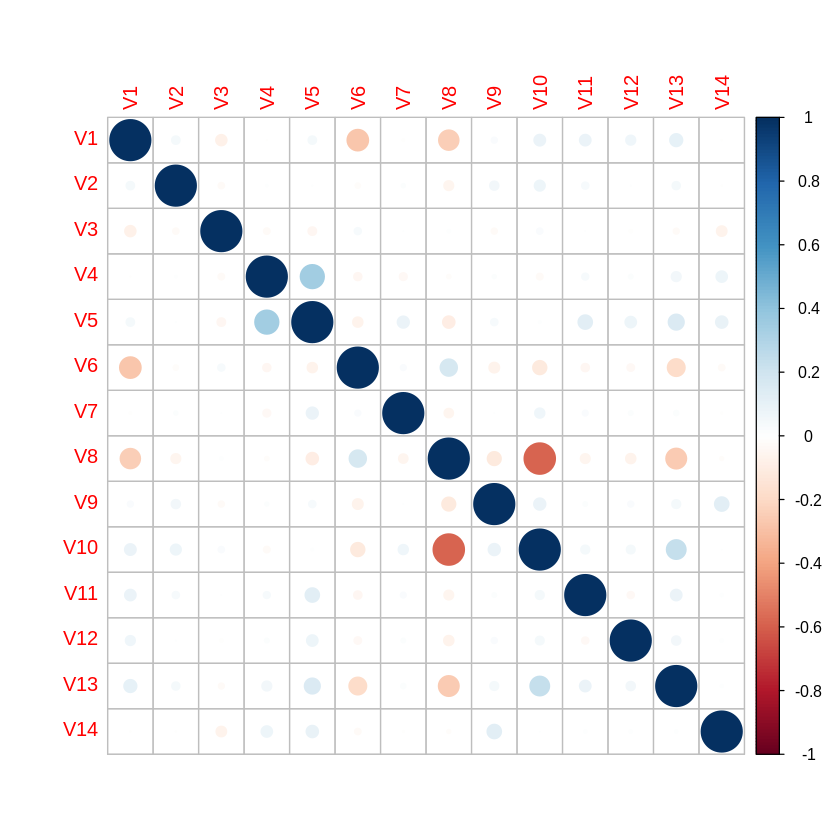

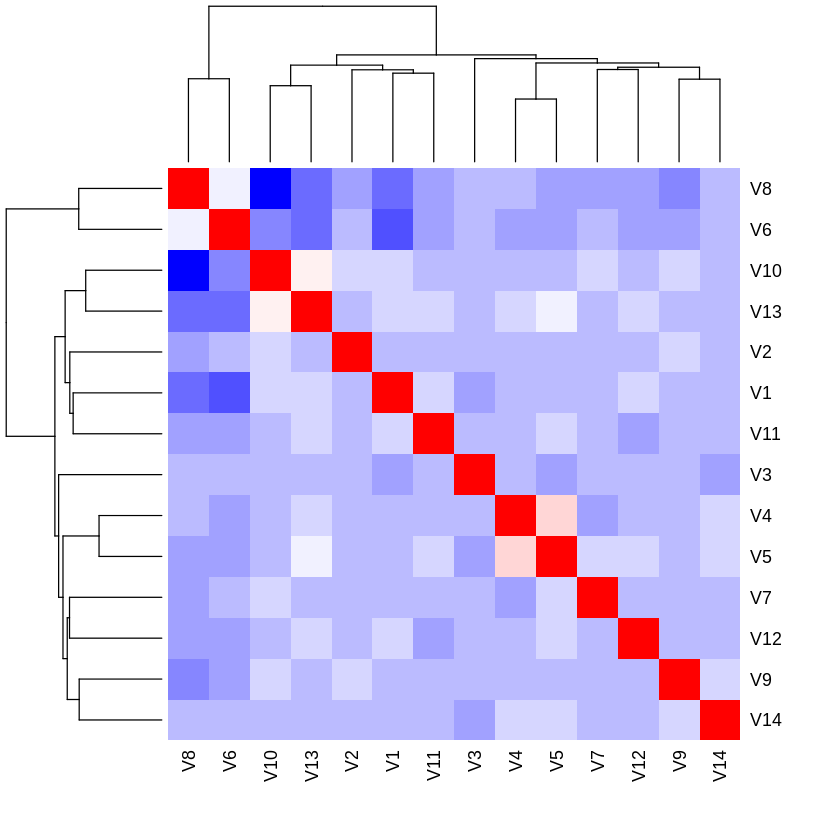

In [9]:
library(corrplot)
x <- adultDS[,1:14]
y <- adultDS[,15]
res <- cor(x)
corrplot(res)
round(res, 2)
col<- colorRampPalette(c("blue", "white", "red"))(20)
heatmap(x = res, col = col, symm = TRUE)

Si se desea construir un diagrama de cajas y bigotes por atributo, se debe utilizar la función `boxplot(atr)`. Si se desea consturir un histograma para cada atributo, se usa la función `hist(atr)`.

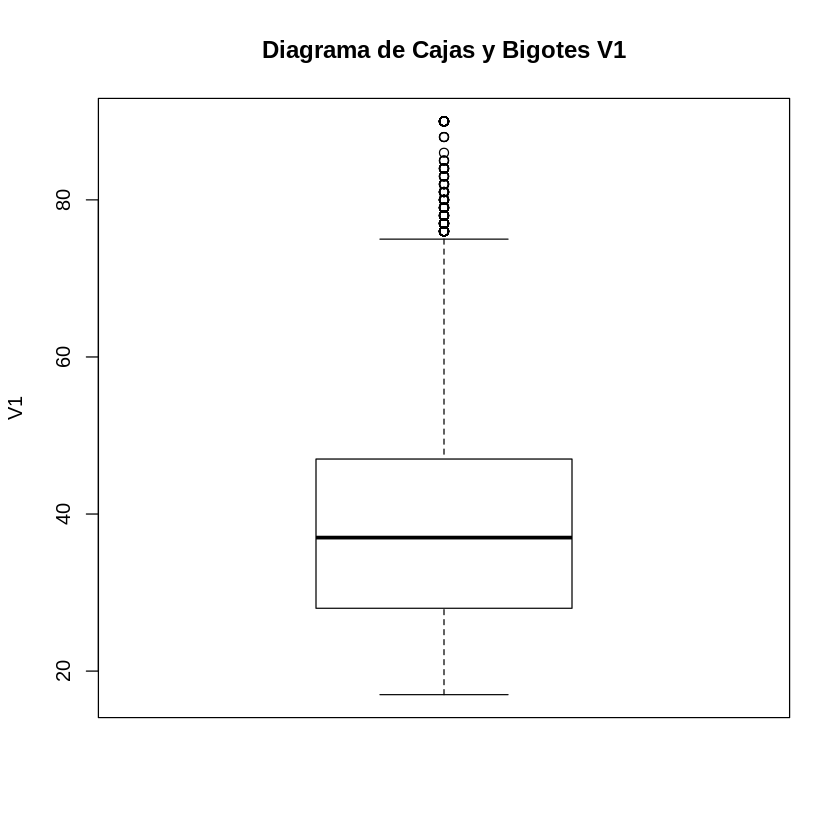

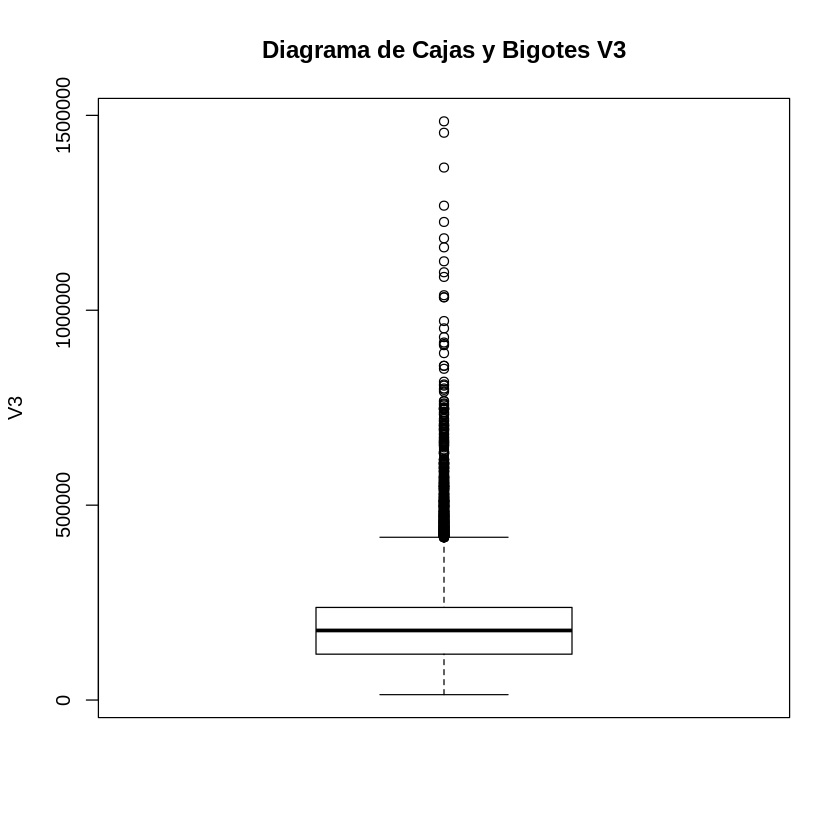

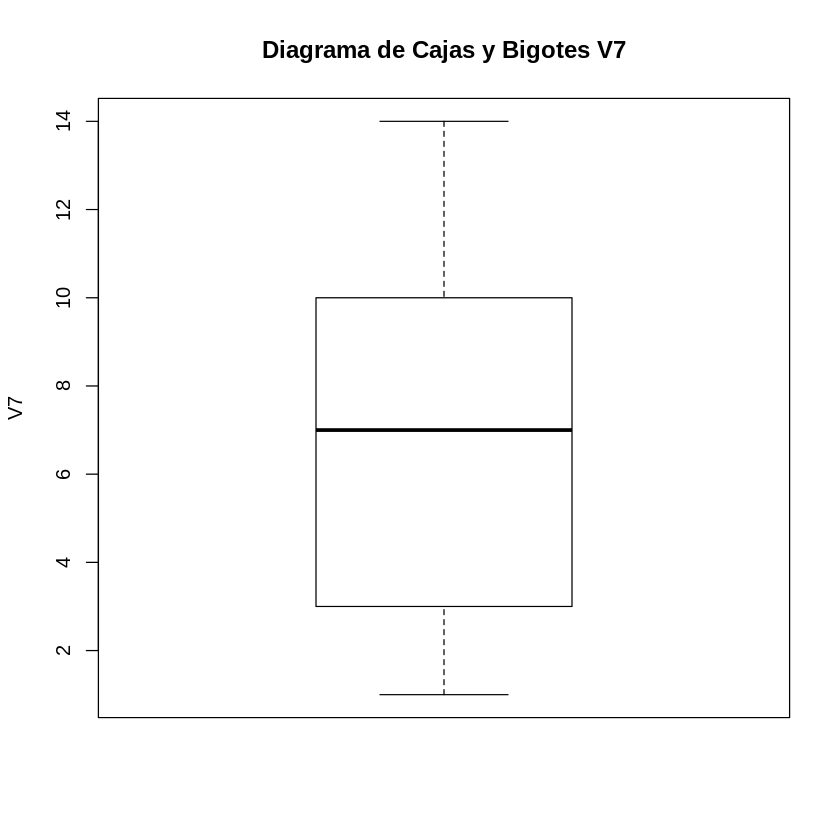

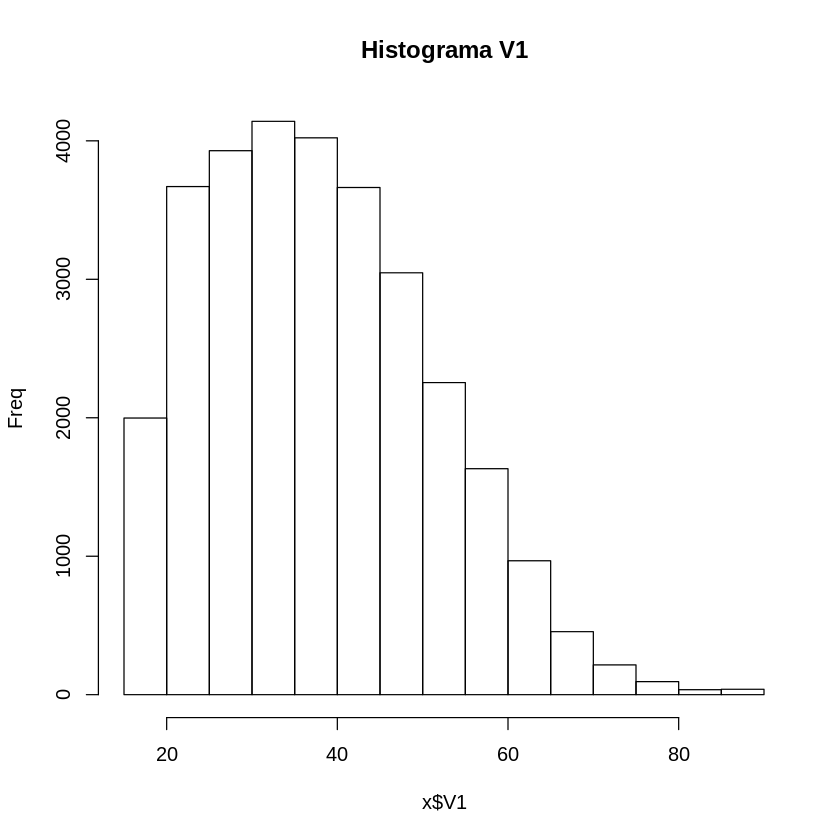

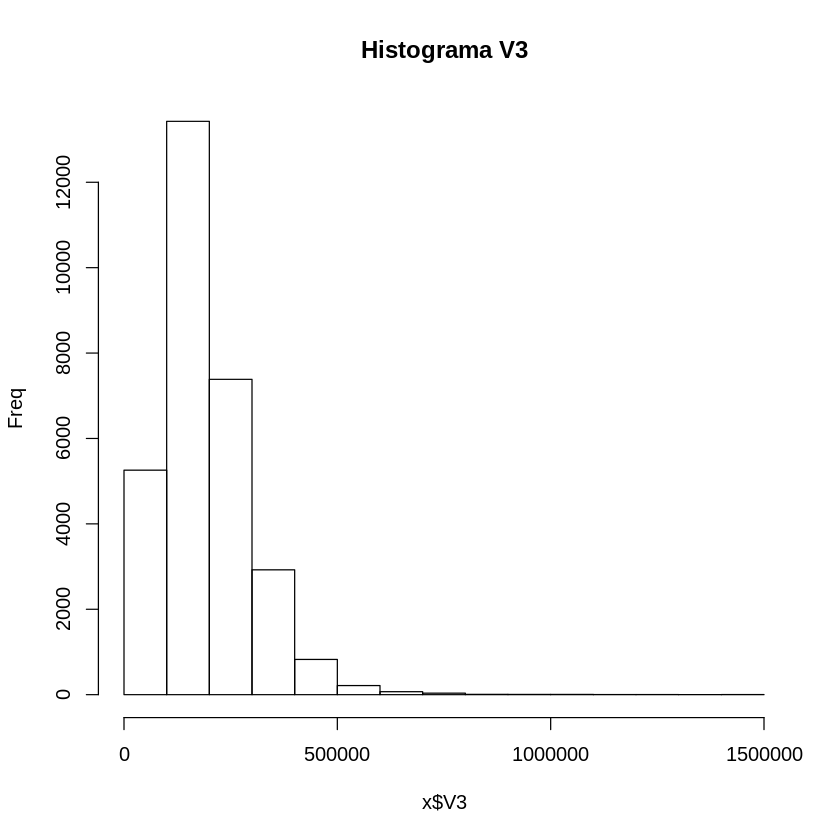

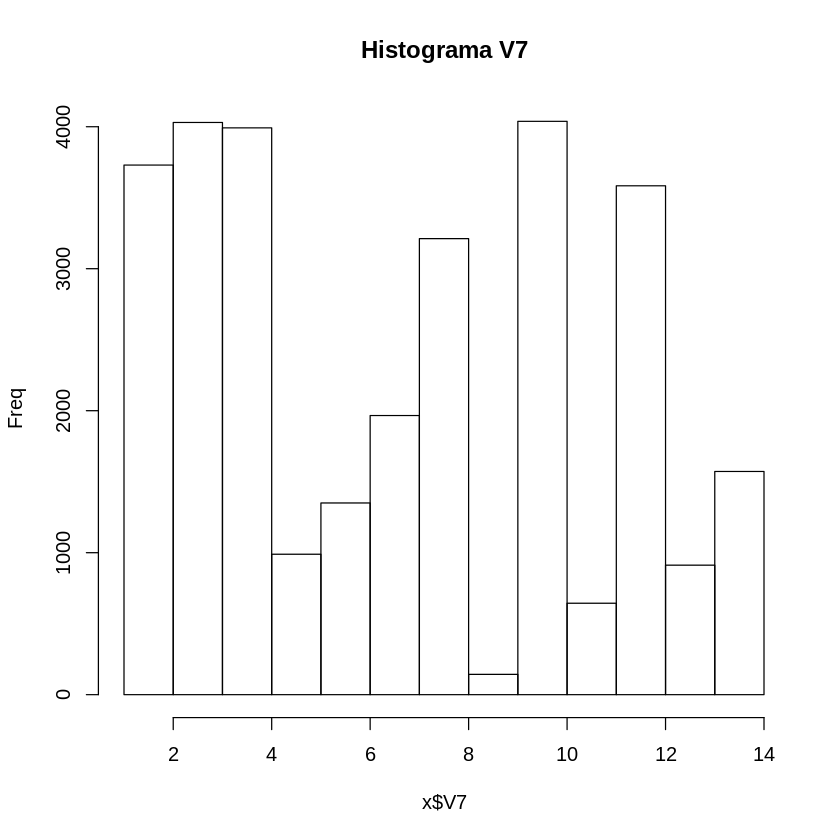

In [10]:
boxplot(x$V1, main="Diagrama de Cajas y Bigotes V1", ylab="V1")
boxplot(x$V3, main="Diagrama de Cajas y Bigotes V3", ylab="V3")
boxplot(x$V7, main="Diagrama de Cajas y Bigotes V7", ylab="V7")
#boxplot(x$V11, main="Diagrama de Cajas y Bigotes V11", ylab="V11")
# y demás...

hist(x$V1, main="Histograma V1", ylab="Freq")
hist(x$V3, main="Histograma V3", ylab="Freq")
hist(x$V7, main="Histograma V7", ylab="Freq")


Para construir una matriz de scatterplot, se utiliza la función `pairs` en donde se especifican los atributos y el conjunto de datos que se está usando.

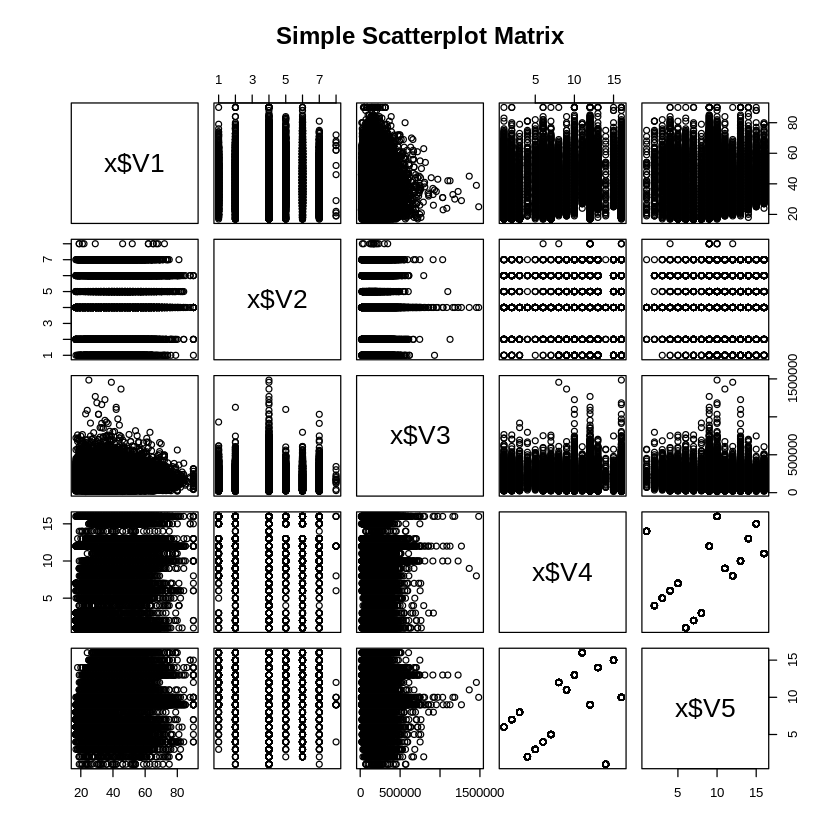

In [11]:
pairs(~x$V1+x$V2+x$V3+x$V4+x$V5,data=x, 
   main="Simple Scatterplot Matrix")